In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [3]:
data = pd.read_csv(r"C:\Users\dazvi\Downloads\ifood_df.csv")
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [5]:
data.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [16]:
data[['Z_CostContact','Z_Revenue']]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2200,3,11
2201,3,11
2202,3,11
2203,3,11


In [17]:
data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

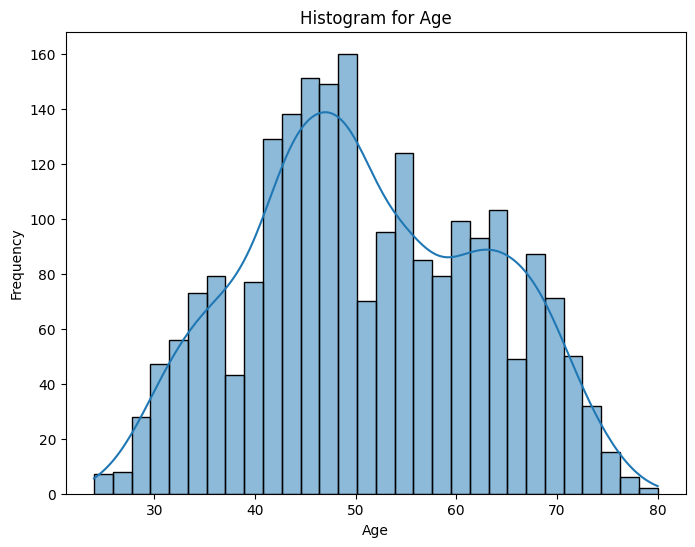

In [18]:
#histogram for age
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.089941
Kurtosis: -0.797036


In [ ]:
'''
The age distribution looks approximately symmetrical and the left and right sides of distribution are roughly equal. 
Skewness of 0.09 (close to zero) supports the visual observation of the distribution.
Kurtosis of -0.8 suggests that the distribution is close to normal with lighter tails and less peaked than a normal distribution.
'''

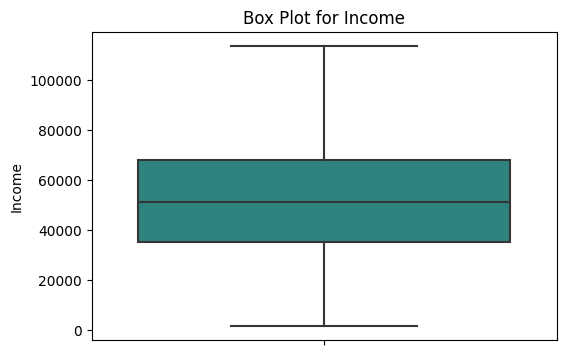

In [20]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()


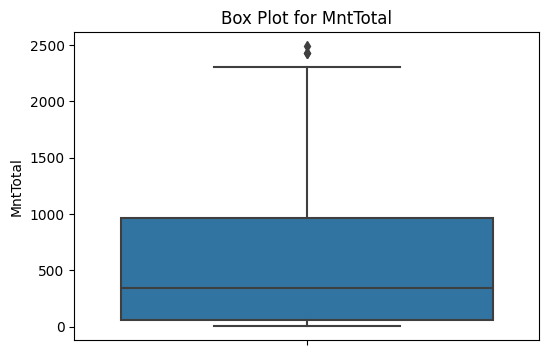

In [21]:
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [22]:
Q1 = data['MntTotal'].quantile(0.25)
Q3 = data['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['MntTotal'] < lower_bound) | (data['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [26]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


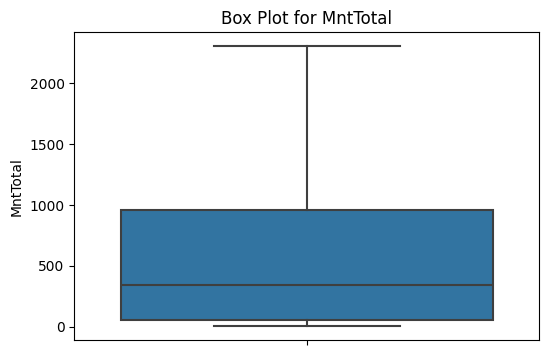

In [27]:
#checking purpose
plt.figure(figsize=(6, 4))  
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

In [30]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)


Text(0, 0.5, 'MntTotal')

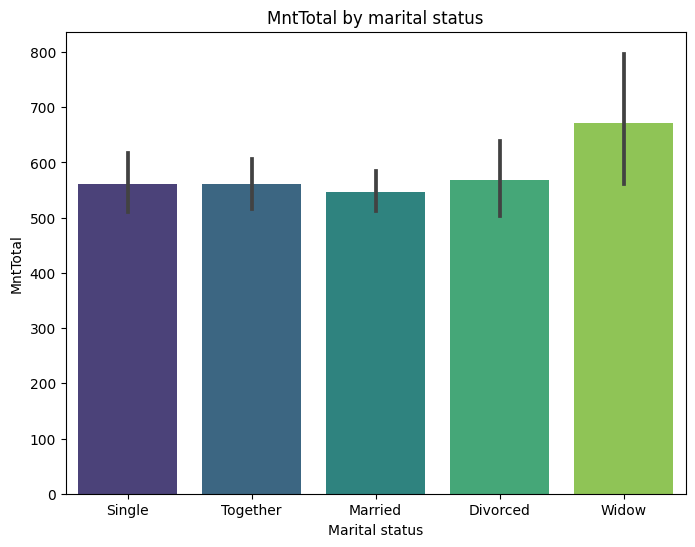

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [32]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()    

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


Text(0, 0.5, 'MntTotal')

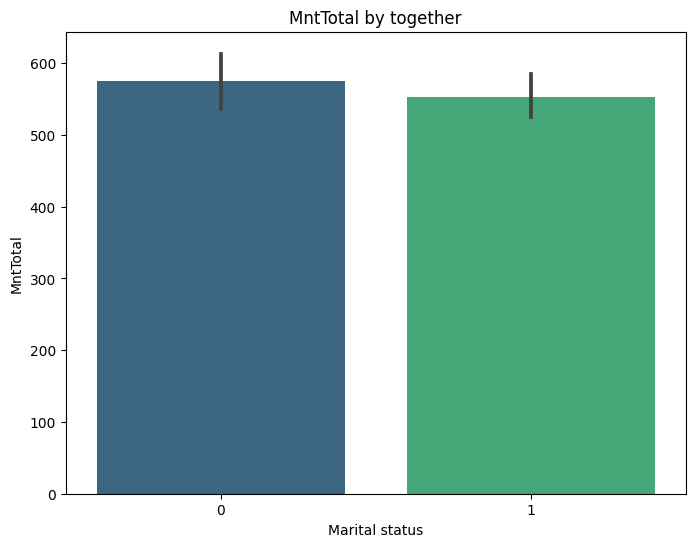

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x='In_relationship', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by together')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [34]:
from sklearn.cluster import KMeans

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.742785e-17,-8.873717e-17,-4.678869e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


In [36]:
data_scaled[cols_for_clustering]

,Income,MntTotal,In_relationship
0,0.317669,1.693815,-1.348874
1,-0.252786,-0.942701,-1.348874
2,0.969430,0.303874,0.741359
3,-1.205543,-0.895496,0.741359
4,0.325166,-0.267837,0.741359
...,...,...,...
2200,0.466884,0.933281,0.741359
2201,0.601880,-0.217135,0.741359
2202,0.261707,1.148329,-1.348874
2203,0.854894,0.387795,0.741359


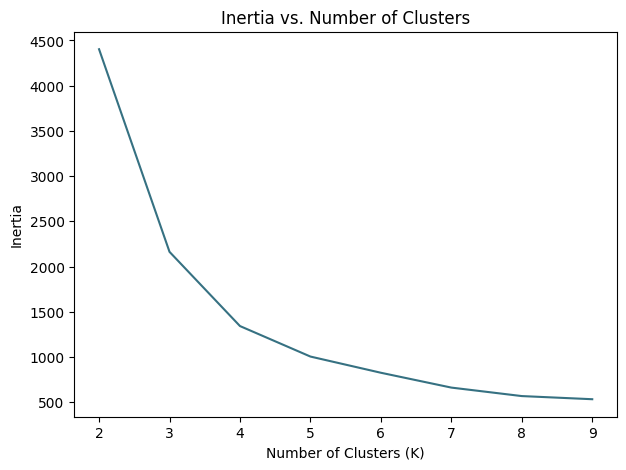

In [39]:
#The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [ ]:
'''
Elbow method suggests 4 or 5 clusters.
'''

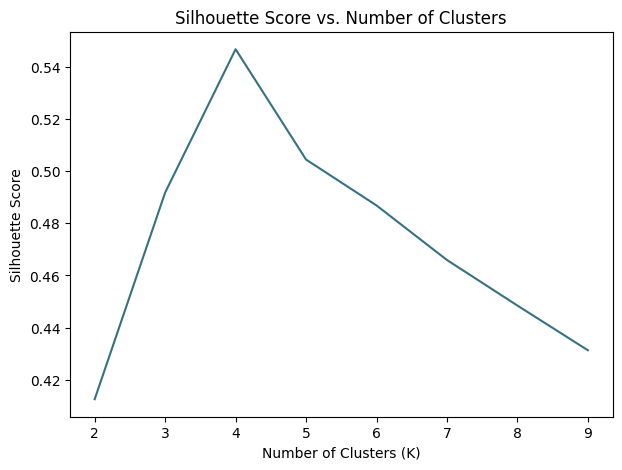

In [40]:
#Silhouette score is a metric that used to assess the quality of clustering. 
#A higher silhouette score indicates that the clusters are well-separated, 
#while a lower score suggests that the clusters may overlap or are poorly defined.
from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

In [41]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

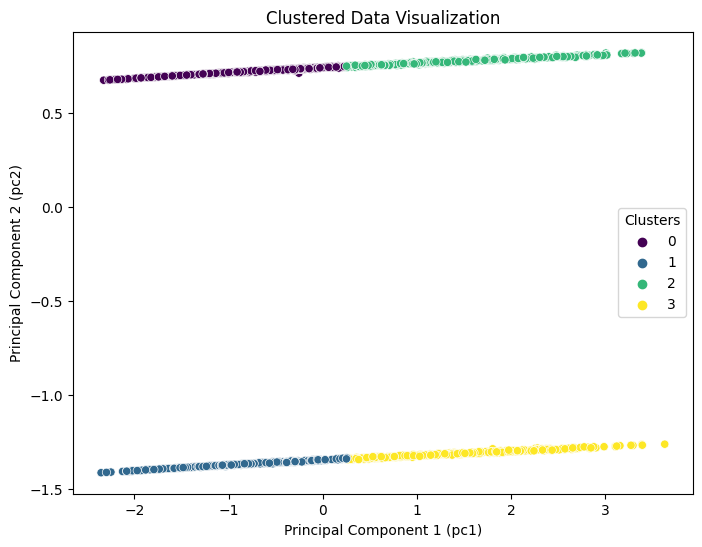

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [43]:
data['Cluster'] = data_scaled.Cluster
data.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,38027.656977,160.412791,1.0
1,37332.339956,150.761589,0.0
2,71914.598930,1153.197861,1.0
3,71946.155488,1159.612805,0.0


Text(0, 0.5, 'MntTotal')

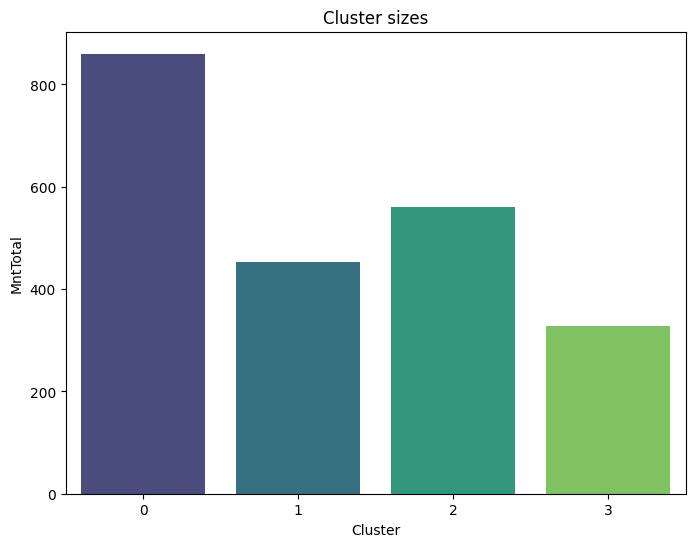

In [47]:
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [49]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,860,39.0
1,1,453,21.0
2,2,561,25.0
3,3,328,15.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


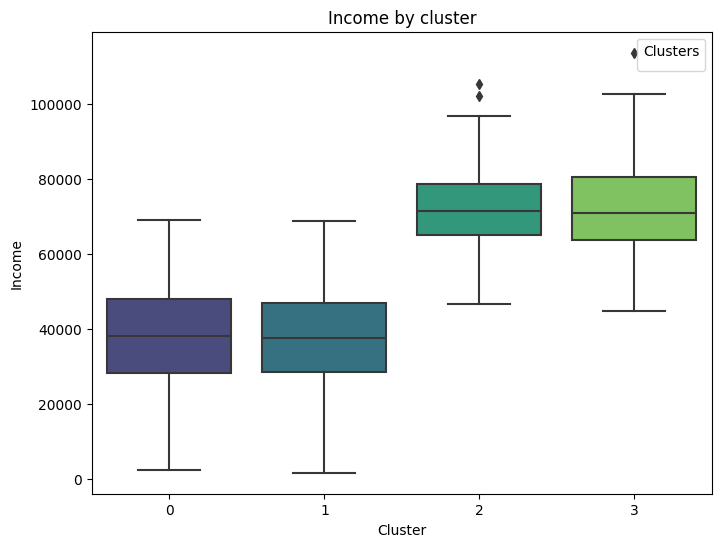

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

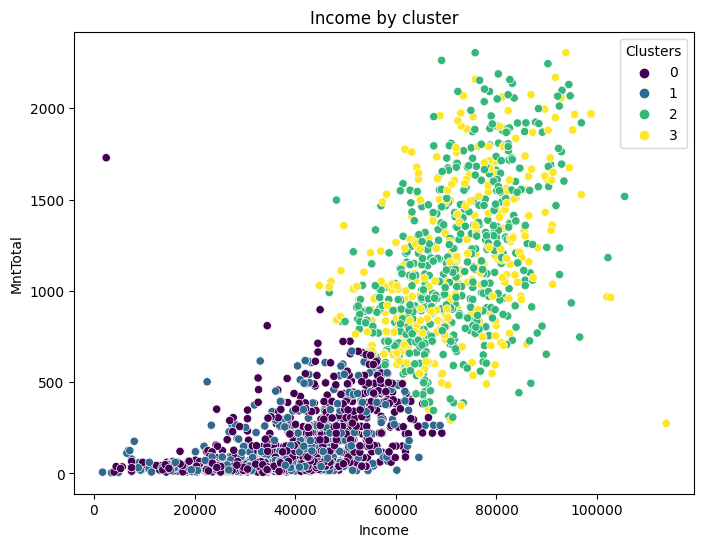

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

Text(0, 0.5, 'In_relationship')

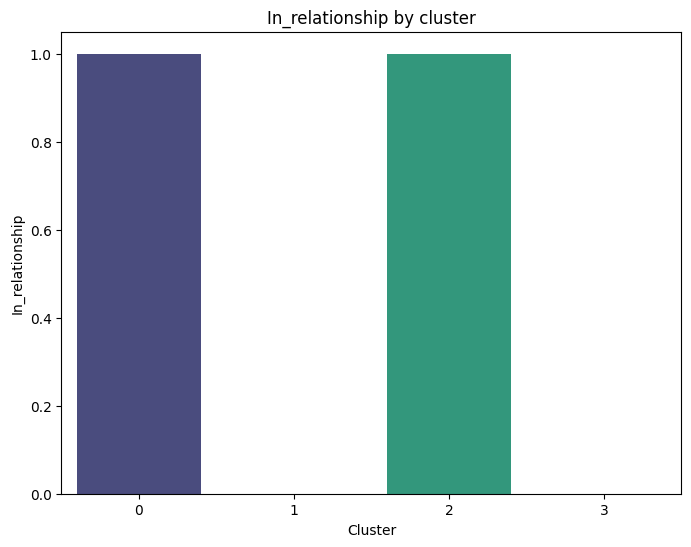

In [52]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=data, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')